<a href="https://colab.research.google.com/github/MauroTalamantes/RegresionLinealMultiple_CasasPrecio/blob/main/Ejercicio_2_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [ ]:
# Cargar los datos
from google.colab import files
uploaded = files.upload()


df = pd.read_csv('Real estate.csv')

# Eliminar la columna No que no nos dice nada, de forma permanente
df.drop('No', axis=1, inplace=True)

Saving Real estate.csv to Real estate.csv


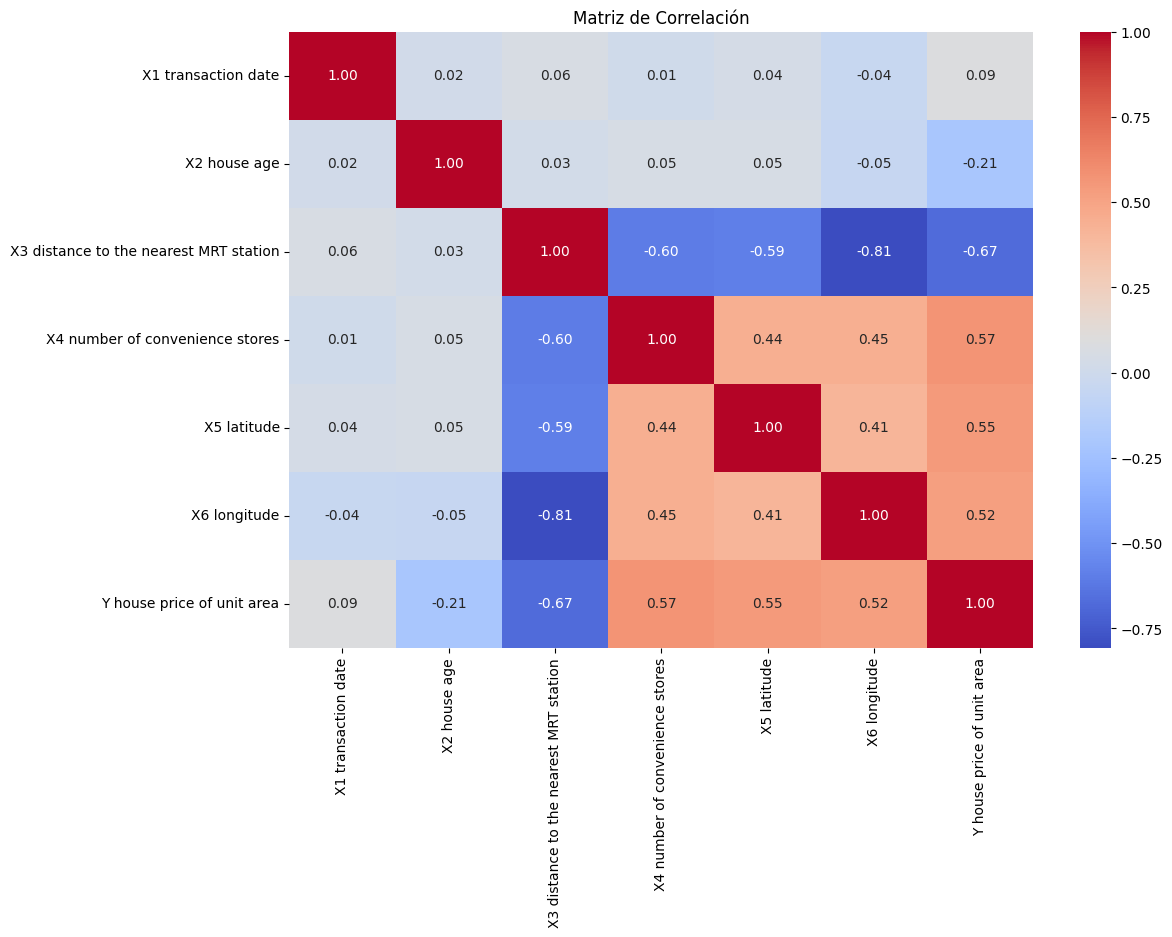

In [ ]:
# Calcular la matriz de correlación
# Explicar la relación entre variables
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Mostrar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

## Relación entre las variables

1. Precio por unidad de área (Y house price of unit area):

  * **X3 Distancia a la estación MRT más cercana:** Tiene una correlación negativa de -0.6736, lo que indica que, en general, cuanto más lejos esté una propiedad de la estación MRT, más bajo será su precio por unidad de área.

  * **X4 Número de tiendas de conveniencia:** Hay una correlación positiva de 0.5710, lo que sugiere que un mayor número de tiendas de conveniencia cercanas está asociado con un mayor precio por unidad de área.

  * **X5 Latitud:** También muestra una correlación positiva de 0.5463 con el precio, lo que podría indicar que la ubicación en términos de latitud influye en el precio.

  * **X6 Longitud:** Tiene una correlación positiva de 0.5233, lo que significa que la ubicación en términos de longitud también influye en el precio de manera similar.

  * **X2 Edad de la casa:** Tiene una correlación negativa de -0.2106, lo que significa que las casas más antiguas tienden a tener precios más bajos.

2. Otras correlaciones relevantes:
  * **X3 Distancia a la estación MRT más cercana y X4 Número de tiendas de conveniencia:** Correlación negativa de -0.6025, lo que significa que las áreas con más tiendas de conveniencia tienden a estar más cerca de una estación MRT.
  * **X3 Distancia a la estación MRT más cercana y X5 Latitud:** Correlación negativa de -0.5911, lo que sugiere que cuanto más lejos está una casa de la estación, también tiende a estar más lejos en términos de latitud.
  * **X3 Distancia a la estación MRT más cercana y X6 Longitud:** Correlación negativa de -0.8063, lo que podría reflejar una relación geográfica entre la distancia a la estación y la posición en términos de longitud.
  
Podemos concluir que el precio de las propiedades está fuertemente influenciado por la proximidad a una estación de MRT (negativamente) y el número de tiendas de conveniencia cercanas (positivamente).

La edad de la casa tiene un impacto negativo en el precio.

La ubicación geográfica (latitud y longitud) también tiene una influencia positiva en el precio, lo que dice que ciertos barrios o áreas más deseables están relacionadas con la ubicación geográfica de las propiedades.



In [ ]:
# Obtener valores de los coeficientes del conjunto de datos de forma manual y con funciones
# Separar las características independientes (X) y la variable dependiente (y)
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

# Cambiar a notación decimal para la impresión
np.set_printoptions(suppress=True)

# Añadir una columna de unos a X para el término independiente (intercepto)
X_manual = np.c_[np.ones(X.shape[0]), X]

# Calcular los coeficientes manualmente usando la fórmula de la regresión lineal
coeficientes_manual = np.linalg.inv(X_manual.T.dot(X_manual)).dot(X_manual.T).dot(y)
print("Coeficientes calculados manualmente:", coeficientes_manual)

##Ahora con libreriras
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo con los datos
modelo.fit(X, y)


# Obtener los coeficientes del modelo
coeficientes = modelo.coef_
print("Coeficientes con scikit-learn:", coeficientes)


Coeficientes calculados manualmente: [-14437.10249799      5.14622771     -0.26969545     -0.00448746
      1.13327691    225.47297509    -12.42359122]
Coeficientes con scikit-learn: [  5.14622746  -0.26969545  -0.00448746   1.1332769  225.47297556
 -12.42360117]


---
# Valor P de las caracteristicas

In [ ]:
import statsmodels.api as sm

# Añadir una constante a X para el término independiente
X_const = sm.add_constant(X)

# Crear el modelo OLS (Ordinary Least Squares)
model = sm.OLS(y, X_const).fit()

# Mostrar el resumen del modelo, que incluye los valores p
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.576
Method:                         Least Squares   F-statistic:                     94.59
Date:                        Sat, 12 Oct 2024   Prob (F-statistic):           4.86e-74
Time:                                04:24:56   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2988.
Df Residuals:                             407   BIC:                             3016.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

Como sabemos el valor p indica la probabilidad de que el coeficiente de una caracteristíca sea cero, en otras palabras, que la variable independiente no tenga efecto sobre la variable dependiente.
En este caso podemos ver que casi todas son signficativas para el modelo de regresión, pero en diferente medida, sin embargo el X6 longitud es mayor a 0.05 por lo que se puede decir que no tiene un impacto imporante en el precio de la vivienda para este modelo.

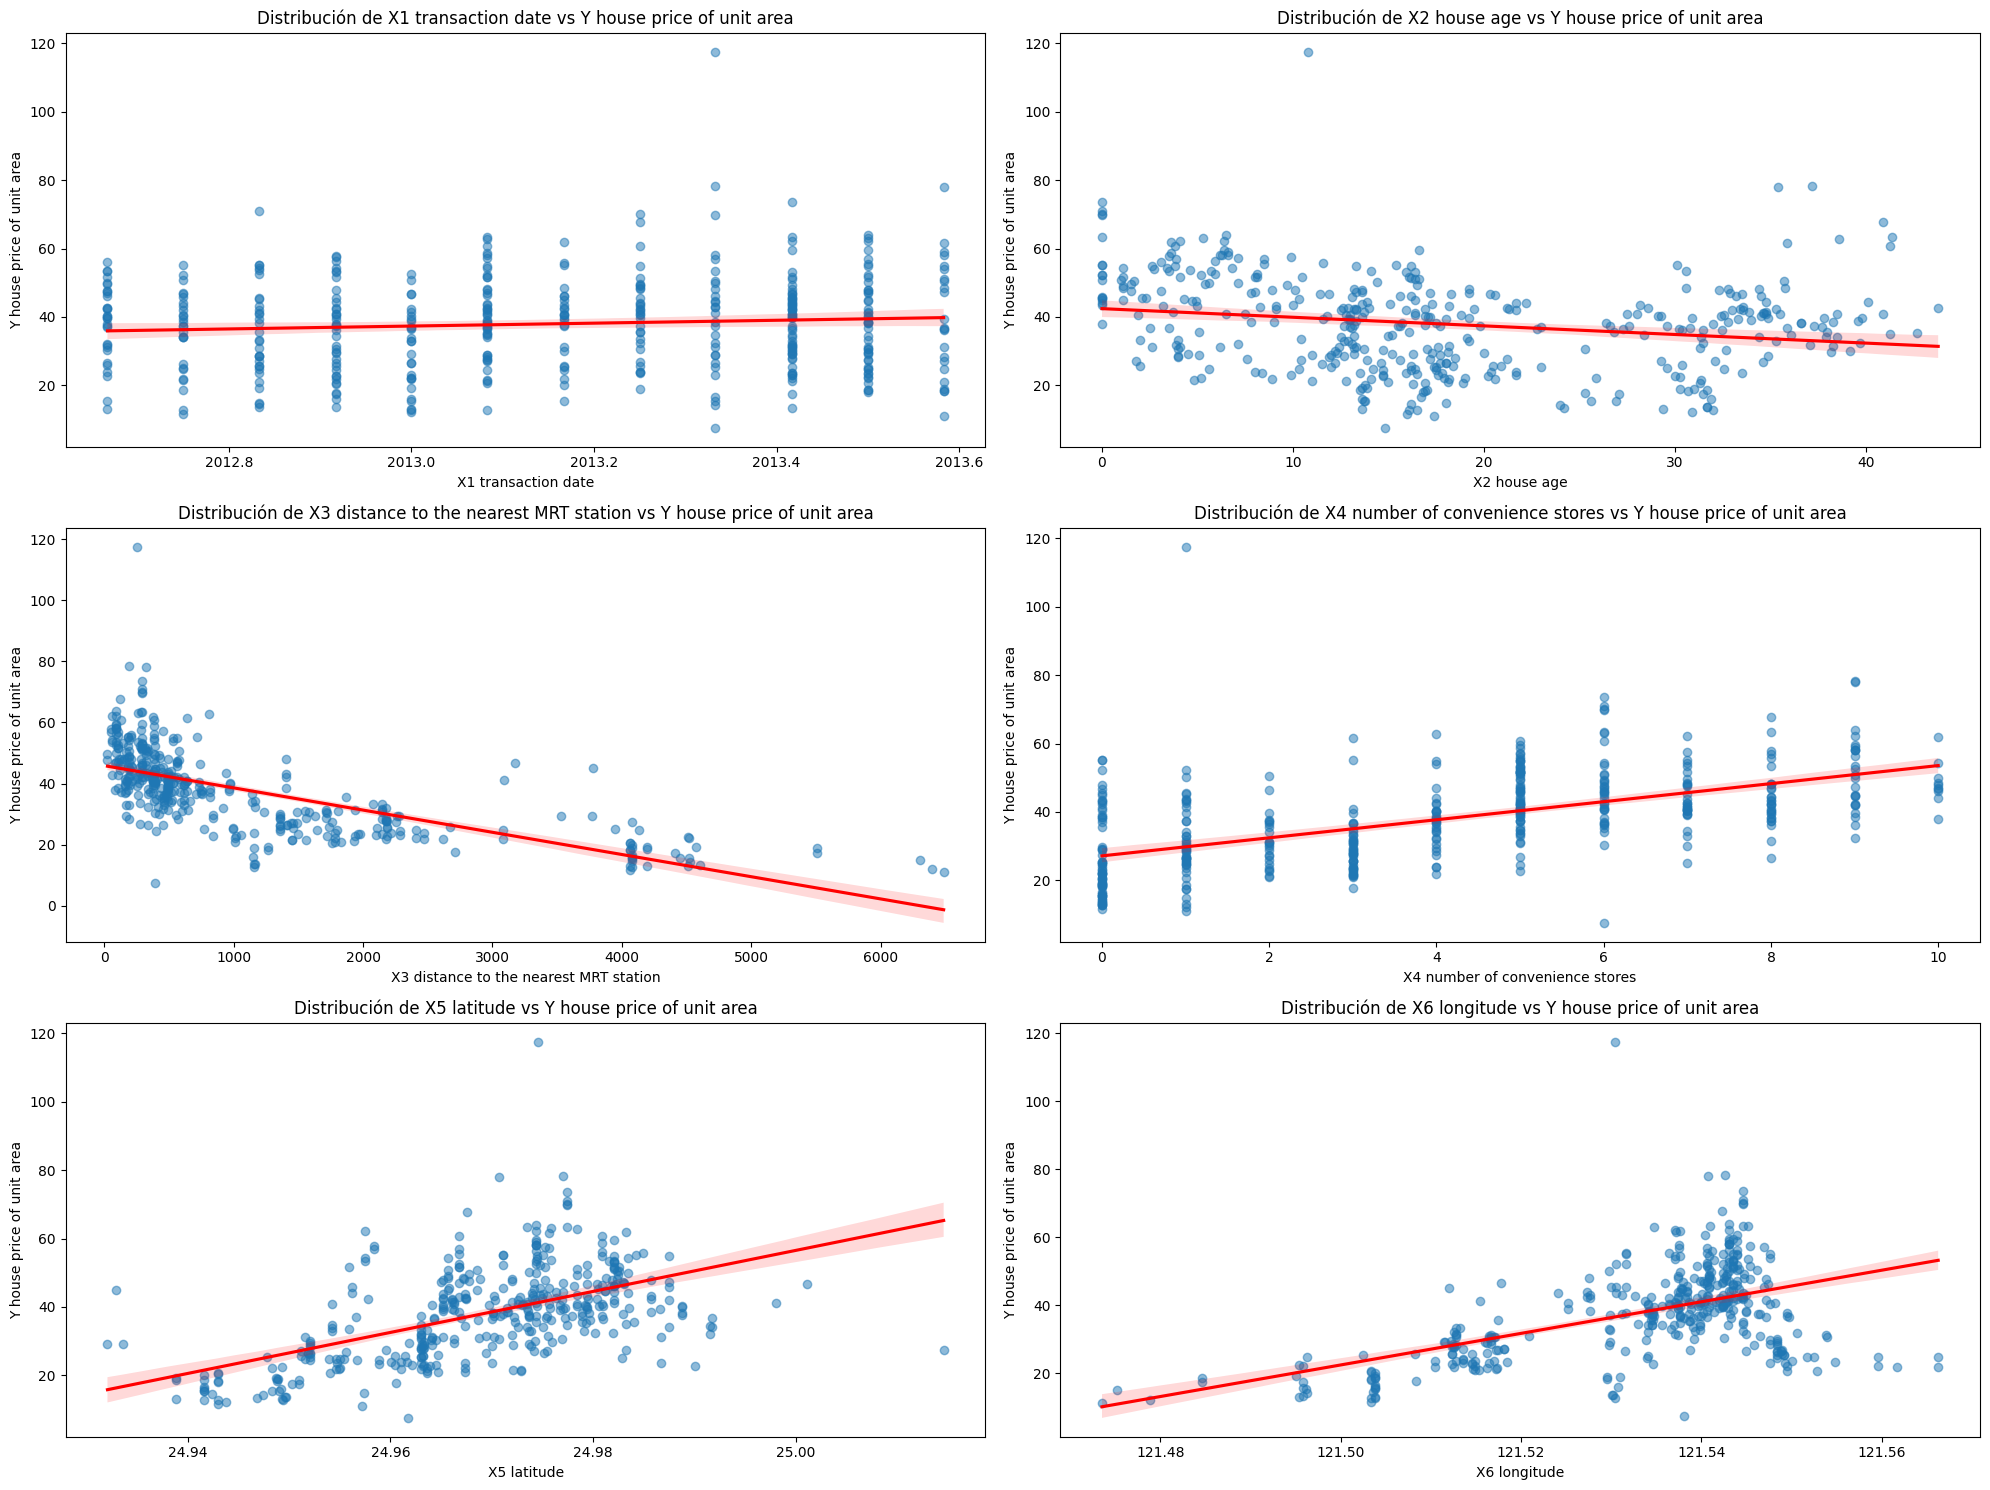

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Supongamos que tus variables independientes son:
# 'Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities_Yes'

variables_independientes = df.drop('Y house price of unit area', axis=1)

# Configuración de la figura
plt.figure(figsize=(20, 15))

# Iterar sobre cada variable independiente
for i, var in enumerate(variables_independientes):
    plt.subplot(3, 2, i + 1)  # Crear subgráficas
    sns.regplot(x=var, y='Y house price of unit area', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Distribución de {var} vs Y house price of unit area')
    plt.xlabel(var)
    plt.ylabel('Y house price of unit area')

plt.tight_layout()
plt.show()


In [ ]:
# Función para calcular R-cuadrada y MSE
def calcular_metrica(var_independiente, var_dependiente):
    X = df[[var_independiente]]
    y = df[var_dependiente]

    # Añadir una columna de unos para el término independiente
    X = sm.add_constant(X)

    # Ajustar el modelo
    model = sm.OLS(y, X).fit()

    # Predicciones
    y_pred = model.predict(X)

    # Calcular MSE
    mse = np.mean((y - y_pred) ** 2)

    return model.rsquared, mse

# Evaluar cada variable independiente
for var in variables_independientes:
    r_squared, mse = calcular_metrica(var, 'Y house price of unit area')
    print(f"Variable: {var} - R-squared: {r_squared:.4f}, MSE: {mse:.4f}")

Variable: X1 transaction date - R-squared: 0.0077, MSE: 183.2756
Variable: X2 house age - R-squared: 0.0443, MSE: 176.5005
Variable: X3 distance to the nearest MRT station - R-squared: 0.4538, MSE: 100.8857
Variable: X4 number of convenience stores - R-squared: 0.3260, MSE: 124.4720
Variable: X5 latitude - R-squared: 0.2985, MSE: 129.5686
Variable: X6 longitude - R-squared: 0.2738, MSE: 134.1161


Basandonos que X3 distance to the nearest MRT station vs Y house price of unit area muestra un 45% podemos decir que es un predictor muy fuerte del precio, ademas que es el que menor MSE presenta, lo que reduce considerablemente los errores basados en la prediccion de esta variable.

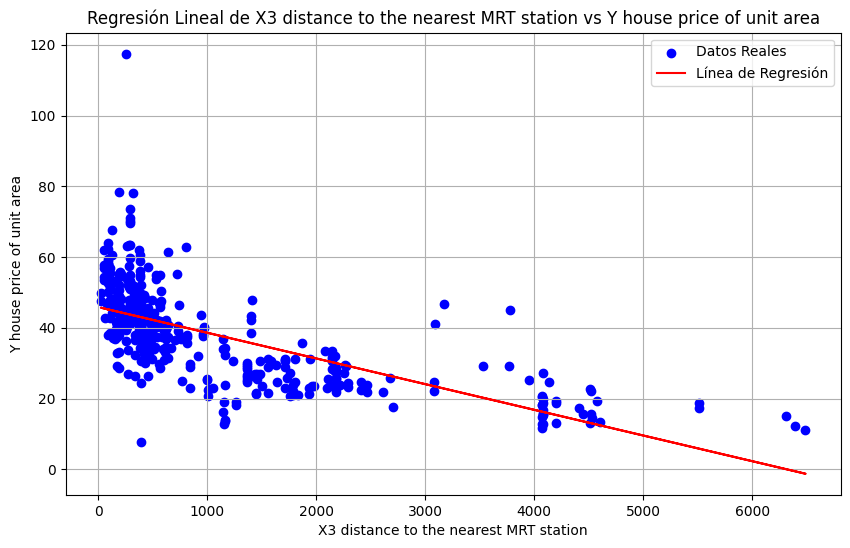

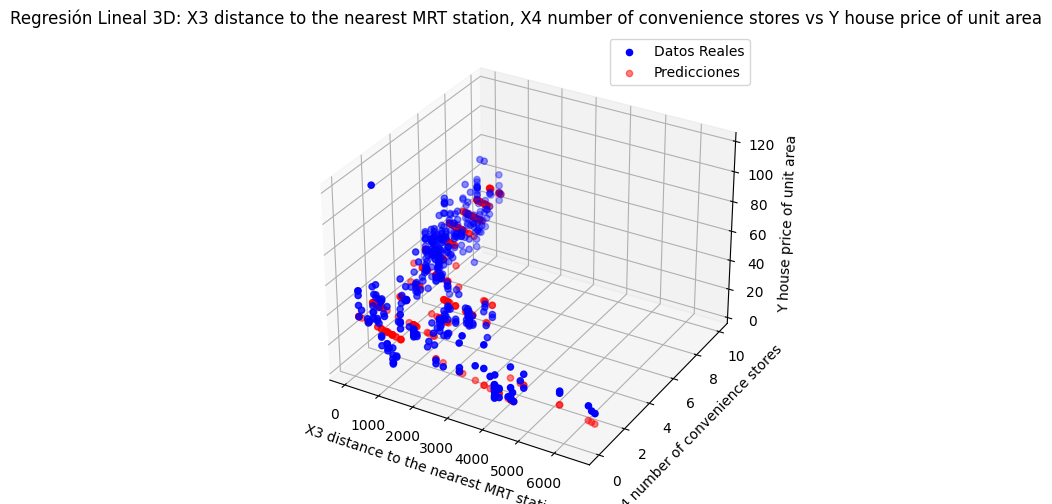

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Graficar en 2D para la mejor variable (Previous Scores)
def graficar_2d(var_independiente, var_dependiente):
    X = df[[var_independiente]]
    y = df[var_dependiente]

    # Añadir una columna de unos para el término independiente
    X = sm.add_constant(X)

    # Ajustar el modelo
    model = sm.OLS(y, X).fit()

    # Predicciones
    y_pred = model.predict(X)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.scatter(df[var_independiente], y, color='blue', label='Datos Reales')
    plt.plot(df[var_independiente], y_pred, color='red', label='Línea de Regresión')
    plt.title(f'Regresión Lineal de {var_independiente} vs {var_dependiente}')
    plt.xlabel(var_independiente)
    plt.ylabel(var_dependiente)
    plt.legend()
    plt.grid()
    plt.show()

# Graficar en 3D para las mejores dos variables
def graficar_3d(var_independiente1, var_independiente2, var_dependiente):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Datos
    x = df[var_independiente1]
    y = df[var_independiente2]
    z = df[var_dependiente]

    # Ajustar el modelo
    X = df[[var_independiente1, var_independiente2]]
    X = sm.add_constant(X)
    model = sm.OLS(z, X).fit()
    z_pred = model.predict(X)

    # Graficar los datos y la superficie de regresión
    ax.scatter(x, y, z, color='blue', label='Datos Reales')
    ax.scatter(x, y, z_pred, color='red', label='Predicciones', alpha=0.5)

    # Configuración de la gráfica
    ax.set_title(f'Regresión Lineal 3D: {var_independiente1}, {var_independiente2} vs {var_dependiente}')
    ax.set_xlabel(var_independiente1)
    ax.set_ylabel(var_independiente2)
    ax.set_zlabel(var_dependiente)
    ax.legend()
    plt.show()

# Graficar la regresión 2D usando la mejor variable 'Previous Scores'
graficar_2d('X3 distance to the nearest MRT station', 'Y house price of unit area')

# Graficar la regresión 3D usando 'Hours Studied' y 'Previous Scores'
graficar_3d('X3 distance to the nearest MRT station','X4 number of convenience stores', 'Y house price of unit area')


Intepretando los resultados obtenidos de las métricas de validación (R-squared y MSE) y los coeficientes del modelo de regresión lineal obtenemos:

1. X1 (transaction date):
  * R² = 0.0077: Esto significa que solo el 0.77% de la variabilidad en el precio de la vivienda puede ser explicado por la fecha de transacción. Es un valor muy bajo, lo que sugiere que la fecha de transacción no es un buen predictor del precio de la vivienda.
  * MSE = 183.2756: El error cuadrático medio es relativamente alto, lo que confirma que el modelo no predice bien los precios basándose en la fecha de transacción.
  * Coeficiente: Es una coeficiente positivo, lo que indica que el precio de la vivienda aumenta conforme los años, pero su poca significancia indica que no hay fluctuaciones importantes con el tiempo.

2. X2 (house age):
  * R² = 0.0443: La edad de la casa explica el 4.43% de la variabilidad en el precio de la vivienda. Aunque es un valor bajo, tiene un poco más de relevancia que la fecha de transacción.
  * MSE = 176.5005: El MSE es más bajo en comparación con X1, lo que indica que el modelo tiene un poco menos de error cuando usa la edad de la casa para predecir el precio.
  * Coeficiente: Un valor negativo que indica que el precio disminuye conforme aumenta la edad de la casa.

3. X3 (distance to the nearest MRT station):
  * R² = 0.4538: Este valor es bastante alto en comparación con las demás variables, lo que significa que la distancia a la estación de MRT más cercana explica el 45.38% de la variabilidad en el precio de la vivienda. Esto sugiere que es un predictor importante del precio.
  * MSE = 100.8857: Este MSE es mucho más bajo que los anteriores, lo que indica que el modelo tiene menos error cuando usa esta variable para predecir el precio de la vivienda. La proximidad al transporte público parece ser un factor crucial.
  * Coeficiente: Es un coeficiente muy pequeño, redondeandolo seria 0, pero si fuera una escala muy grande aun podría tener un impacto indicando que entre mas lejos de la estación mas barata será.

4. X4 (number of convenience stores):
  * R² = 0.3260: El número de tiendas de conveniencia cercanas explica el 32.60% de la variabilidad en el precio de la vivienda. Es un valor considerable, lo que indica que es un buen predictor.
  * MSE = 124.4720: El MSE es relativamente bajo, lo que sugiere que el modelo predice con razonable precisión cuando usa esta variable.
  * Coeficiente: Este coeficiente si indica que el acceso a servicios cercanos, como tiendas tienen un impacto positov en los precios.

5. X5 (latitude):
  * R² = 0.2985: La latitud explica el 29.85% de la variabilidad en el precio de la vivienda. Es un valor moderado, lo que indica que la latitud tiene cierta importancia como predictor del precio.
  * MSE = 129.5686: El MSE es relativamente bajo, lo que sugiere que el modelo tiene un error razonable usando esta variable.
  * Coeficiente: Un coeficiente positivo bastante alto a comparacion de los demas, que sugiere que entre mas al norte mas cuesta, pero su R² nos dice que su variabilidad del precio por esta variable solo es algo moderada.

6. X6 (longitude):
  * R² = 0.2738: La longitud explica el 27.38% de la variabilidad en el precio de la vivienda. Aunque es inferior a las otras variables, todavía muestra cierta capacidad de predicción.
  * MSE = 134.116: El MSE es el más alto en comparación con las otras variables significativas, lo que indica que la longitud tiene menos capacidad para predecir el precio de la vivienda.
  * Coeficiente: Es negativo y podría considerarse que si estan mas hacia el este son menos costosas, y su R nos dice que tiene influencia en el precio pero sin ser tan fuerte como los demas.

Conclusión:

X3 (distance to the nearest MRT station) es, por mucho, el mejor predictor del precio de la vivienda, con el valor más alto de R² (0.4538) y el MSE más bajo.

Esto sugiere que la proximidad al transporte público tiene un impacto significativo en el precio.

X4 (number of convenience stores) y X5 (latitude) también son buenos predictores, con valores de R² superiores al 0.3, lo que indica que el acceso a servicios y la ubicación geográfica son factores relevantes.

X6 (longitude) es el predictor menos relevante entre las variables con cierto grado de significancia, mientras que X1 (transaction date) y X2 (house age) tienen poco impacto en la predicción del precio de la vivienda.

